In [1]:
from pathlib import Path
import json
from collections import Counter
from enum import Enum
from typing import List, Union

class VulnCategory(str, Enum):
    WEB_APP = "WEB_APP"
    API = "API"

class SeverityLevel(str, Enum):
    HIGH = "HIGH"
    MEDIUM = "MEDIUM"
    LOW = "LOW"

def map_severity_to_level(severity: Union[List[float], None]) -> str:
    """Map severity scores to standardized levels
    
    Args:
        severity: List of severity scores or None
    Returns:
        Severity level string
    """
    if not severity:  # Handle None or empty list
        return SeverityLevel.LOW.value
        
    # Filter out None values and convert to float
    valid_scores = [float(score) for score in severity if score is not None]
    
    if not valid_scores:  # If no valid scores after filtering
        return SeverityLevel.LOW.value
    
    # Use the highest severity score
    max_severity = max(valid_scores)
    
    if max_severity >= 7.0:
        return SeverityLevel.HIGH.value
    elif max_severity >= 4.0:
        return SeverityLevel.MEDIUM.value
    else:
        return SeverityLevel.LOW.value

def analyze_vulnerability_categories():
    reports_dir = Path("reports")
    # Create nested counters for each category and severity
    category_severity_counts = {
        VulnCategory.WEB_APP.value: Counter(),
        VulnCategory.API.value: Counter()
    }
    category_totals = Counter()

    # Process all JSON files in the reports directory
    for report_file in reports_dir.glob("*.json"):
        with open(report_file, "r") as f:
            try:
                report = json.load(f)
                category = report.get("vuln_category")
                
                # Only process WEB_APP and API vulnerabilities
                if category not in [VulnCategory.WEB_APP.value, VulnCategory.API.value]:
                    continue
                
                severity = map_severity_to_level(report.get("severity"))
                category_severity_counts[category][severity] += 1
                category_totals[category] += 1
                
            except json.JSONDecodeError:
                print(f"Error reading {report_file}")
                continue

    # Print the results
    print("\nVulnerability Analysis by Category and Severity")
    print("=" * 45)
    
    for category in [VulnCategory.WEB_APP.value, VulnCategory.API.value]:
        total = category_totals[category]
        print(f"\n{category} Vulnerabilities (Total: {total})")
        print("-" * 35)
        
        for severity in SeverityLevel:
            count = category_severity_counts[category][severity.value]
            percentage = (count / total * 100) if total > 0 else 0
            print(f"{severity.value:6}: {count:3} ({percentage:.1f}%)")

if __name__ == "__main__":
    analyze_vulnerability_categories()


KeyboardInterrupt: 

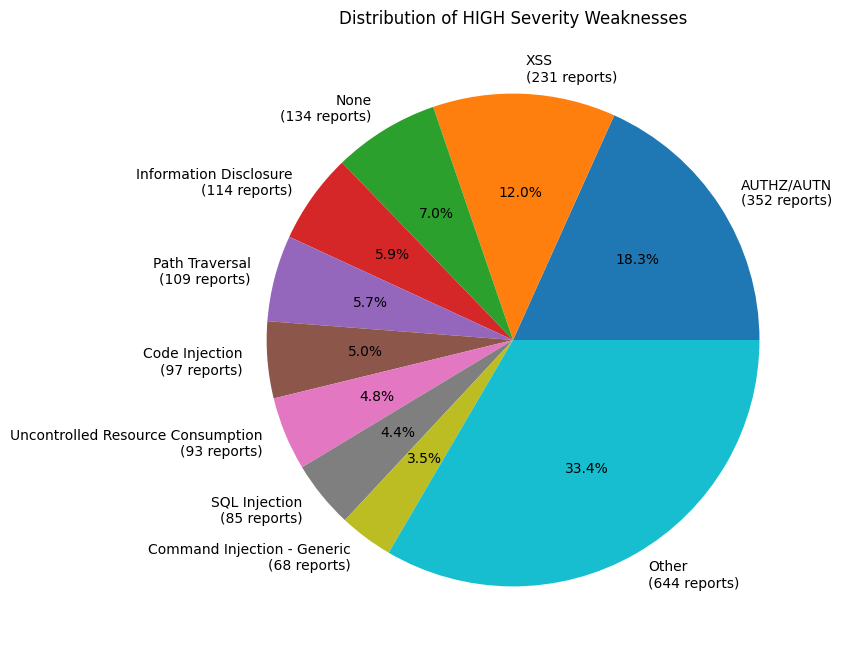

In [15]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

START_YEAR = 2012
END_YEAR = 2026

def epoch_to_year(epoch_time):
    """Convert Unix epoch timestamp to year
    
    Args:
        epoch_time (int): Unix epoch timestamp
        
    Returns:
        int: Year extracted from timestamp
    """
    return datetime.fromtimestamp(epoch_time).year

def convert_weakness(weakness):
    ISSUES_MAPPING = {
        "XSS": [
            "Cross-site Scripting (XSS) - Stored",
            "Cross-site Scripting (XSS) - DOM", 
            "Cross-site Scripting (XSS) - Reflected",
            "Cross-site Scripting (XSS) - Generic",
            "Reflected XSS"
        ],
        "AUTHZ/AUTN": [
            "Improper Access Control - Generic",
            "Insecure Direct Object Reference (IDOR)",
            "Improper Authentication - Generic", 
            "Authentication Bypass Using an Alternate Path or Channel",
            "Improper Authorization",
            "Authentication Bypass",
            "Missing Critical Step in Authentication",
            "Incorrect Authorization",
            "Improper Privilege Management",
            "Incorrect Privilege Assignment",
            "Privilege Escalation",
        ]
    }
    # Check if weakness matches any values in the mapping
    for key, values in ISSUES_MAPPING.items():
        if weakness in values:
            return key
            
    # Return original weakness if no match found
    return weakness

def analyze_top_weaknesses():
    """Analyze top 9 weaknesses across all years (HIGH severity only)"""
    reports_dir = Path("reports")
    
    # Initialize weakness counter
    weakness_counts = Counter()
    
    # Process all reports
    for report_file in reports_dir.glob("*.json"):
        with open(report_file, "r") as f:
            try:
                report = json.load(f)
                
                # Skip if not HIGH severity
                severity = map_severity_to_level(report.get("severity"))
                if severity != SeverityLevel.HIGH.value:
                    continue
                    
                weaknesses = report.get("weaknesses", [])
                if not weaknesses:
                    continue
                    
                # Count each weakness
                for weakness in weaknesses:
                    weakness = convert_weakness(weakness)
                    weakness_counts[weakness] += 1
                    
            except (json.JSONDecodeError, KeyError):
                continue
                
    # Get top 9 weaknesses
    top_9 = weakness_counts.most_common(9)
    
    # Calculate sum of other weaknesses
    top_9_names = [w[0] for w in top_9]
    other_sum = sum(count for weakness, count in weakness_counts.items() 
                   if weakness not in top_9_names)
    
    # Prepare data for pie chart
    labels = [f"{weakness}\n({count} reports)" for weakness, count in top_9]
    labels.append(f"Other\n({other_sum} reports)")
    
    sizes = [count for _, count in top_9]
    sizes.append(other_sum)
    
    # Create pie chart
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.pie(sizes, labels=labels, autopct="%1.1f%%")
    ax.set_title("Distribution of HIGH Severity Weaknesses")
    
    plt.show()

# Run the analysis
analyze_top_weaknesses()


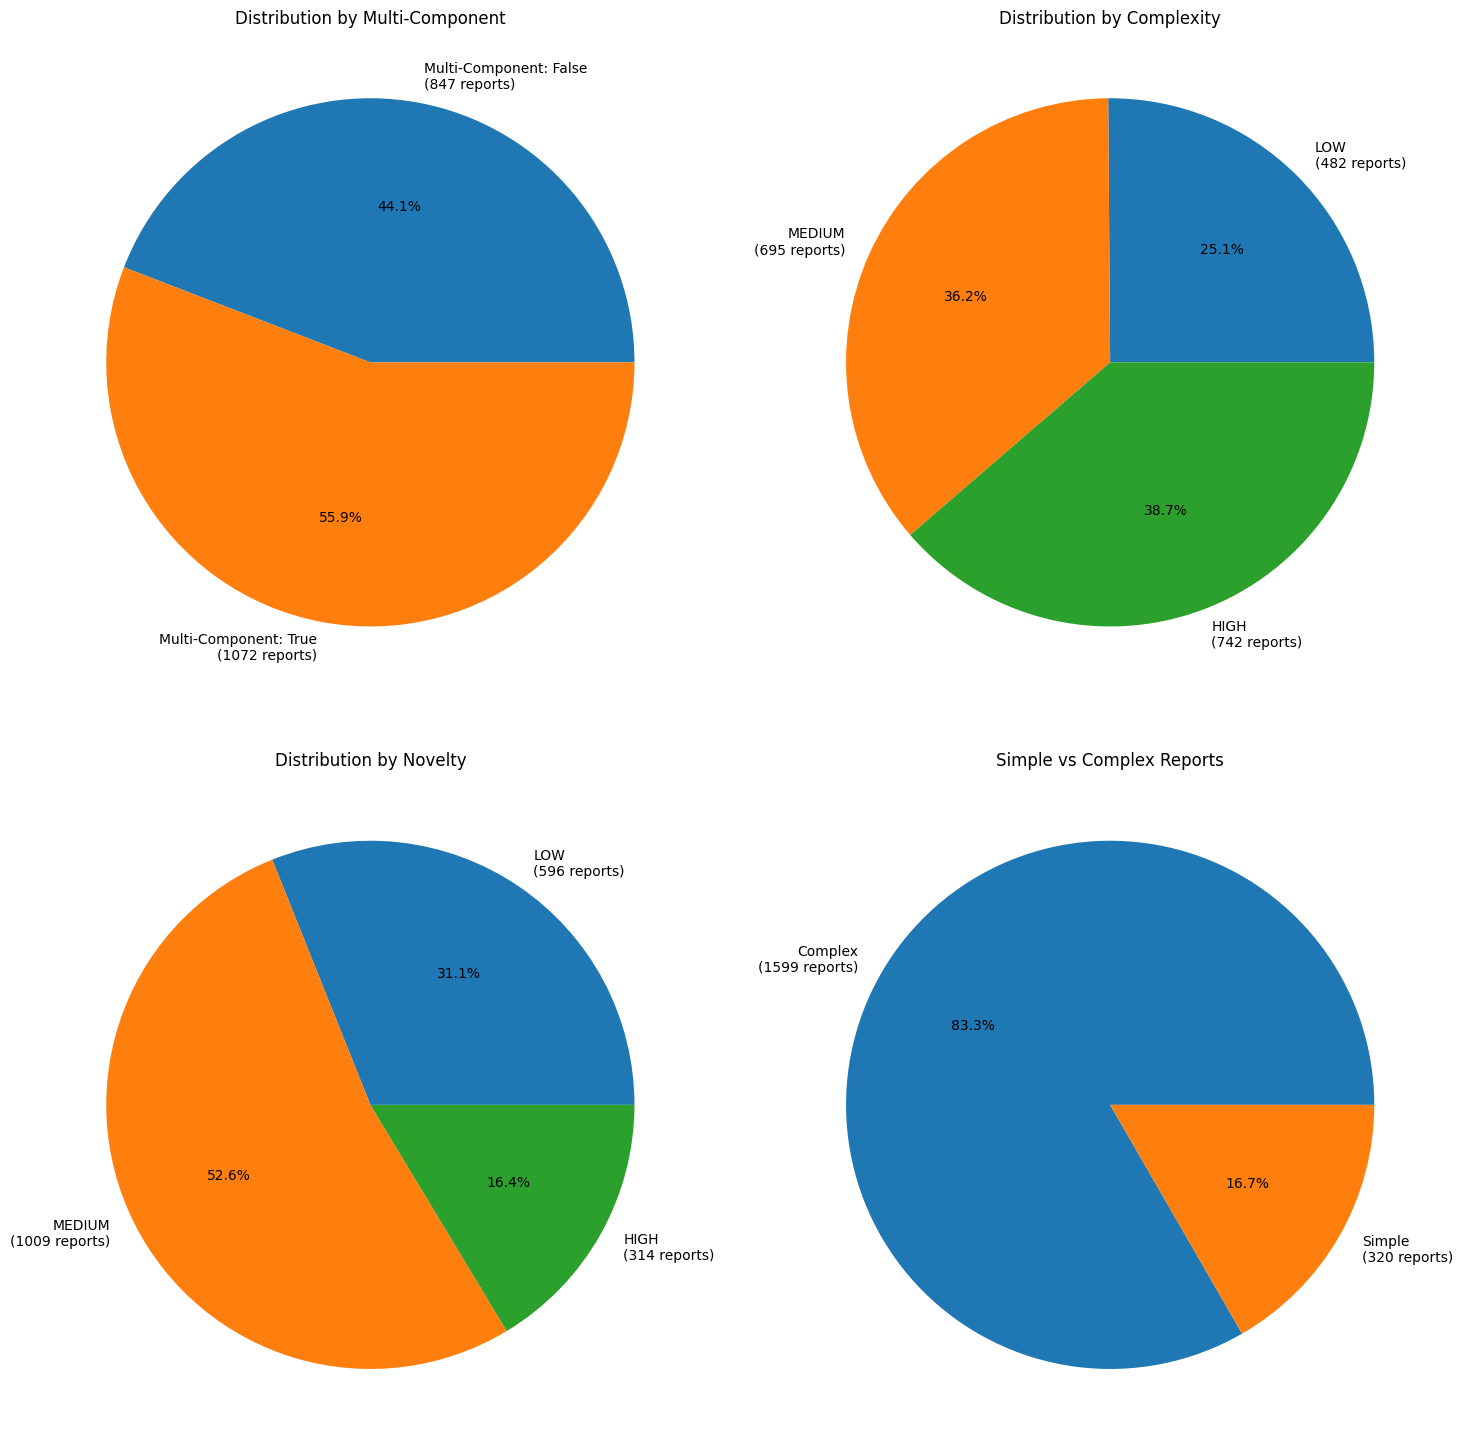

In [20]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

START_YEAR = 2012
END_YEAR = 2026

def convert_weakness(weakness):
    ISSUES_MAPPING = {
        "AUTHZ/AUTN": [
            "Improper Access Control - Generic",
            "Insecure Direct Object Reference (IDOR)",
            "Improper Authentication - Generic", 
            "Authentication Bypass Using an Alternate Path or Channel",
            "Improper Authorization",
            "Authentication Bypass",
            "Missing Critical Step in Authentication",
            "Incorrect Authorization",
            "Improper Privilege Management",
            "Incorrect Privilege Assignment",
            "Privilege Escalation",
        ],
        "INJECTION": [
            "Cross-site Scripting (XSS) - Stored",
            "Cross-site Scripting (XSS) - Generic",
            "Cross-site Scripting (XSS) - Reflected",
            "Cross-site Scripting (XSS) - DOM",
            "SQL Injection",
            "Code Injection",
            "Command Injection - Generic",
            "OS Command Injection",
            "XML External Entities (XXE)",
            "XML Injection",
            "LDAP Injection",
            "Server-Side Request Forgery (SSRF)",
            "Resource Injection",
            "PHP Local File Inclusion",
            "Remote File Inclusion",
            "Blind SQL Injection",
            "CRLF Injection",
            "HTTP Response Splitting",
            "Use of Externally-Controlled Format String",
            "Reflected XSS"
        ]
    }
    # Check if weakness matches any values in the mapping
    for key, values in ISSUES_MAPPING.items():
        if weakness in values:
            return key
            
    # Return original weakness if no match found
    return weakness

def create_pie_chart(data, labels, title, ax):
    """Helper function to create a pie chart"""
    sizes = [count for count in data]
    ax.pie(sizes, labels=labels, autopct="%1.1f%%")
    ax.set_title(title)

def analyze_report_breakdowns():
    """Analyze reports across multiple dimensions"""
    reports_dir = Path("high_reports")
    authnz_dir = Path("authnz")
    
    # Initialize counters
    multi_component_counts = Counter()
    complexity_counts = Counter()
    novelty_counts = Counter() 
    simple_vs_complex_counts = Counter()
    
    # Process all reports
    for report_file in reports_dir.glob("*.json"):
        with open(report_file, "r") as f:
            try:
                report = json.load(f)
                
                # Count multi-component
                is_multi = report.get("is_multi_component", False)
                multi_component_counts[str(is_multi)] += 1
                
                # Count complexity
                complexity = report.get("complexity", "UNKNOWN")
                complexity_counts[complexity] += 1
                
                # Count novelty
                novelty = report.get("novelty", "UNKNOWN") 
                novelty_counts[novelty] += 1
                # Count simple vs complex
                is_simple = False
                weakness = report.get("weaknesses", [])
                if not weakness:
                    continue

                weakness = convert_weakness(weakness[0])
                if weakness == "INJECTION":
                    if not is_multi and complexity == "LOW" and novelty == "LOW":
                        is_simple = True

                elif weakness == "AUTHZ/AUTN":
                    # Check authnz analysis
                    authnz_file = authnz_dir / report_file.name
                    if authnz_file.exists():
                        with open(authnz_file, "r") as af:
                            authnz_data = json.load(af)
                            if (authnz_data.get("idor_detectable", False) or 
                                authnz_data.get("authnz_bypass_detectable", False)):
                                is_simple = True
                
                simple_vs_complex_counts["Simple" if is_simple else "Complex"] += 1
                
            except (json.JSONDecodeError, KeyError):
                continue
    # Create subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
    
    # Multi-component breakdown
    multi_labels = [f"Multi-Component: {k}\n({v} reports)" 
                   for k,v in multi_component_counts.items()]
    create_pie_chart(multi_component_counts.values(), 
                    multi_labels,
                    "Distribution by Multi-Component",
                    ax1)
    
    # Complexity breakdown  
    complexity_labels = [f"{k}\n({v} reports)"
                        for k,v in complexity_counts.items()]
    create_pie_chart(complexity_counts.values(),
                    complexity_labels, 
                    "Distribution by Complexity",
                    ax2)
    
    # Novelty breakdown
    novelty_labels = [f"{k}\n({v} reports)"
                     for k,v in novelty_counts.items()]
    create_pie_chart(novelty_counts.values(),
                    novelty_labels,
                    "Distribution by Novelty",
                    ax3)
    
    # Simple vs Complex
    simple_labels = [f"{k}\n({v} reports)"
                    for k,v in simple_vs_complex_counts.items()]
    create_pie_chart(simple_vs_complex_counts.values(),
                    simple_labels,
                    "Simple vs Complex Reports",
                    ax4)
    
    plt.tight_layout()
    plt.show()

# Run the analysis
analyze_report_breakdowns()


In [ ]:
def convert_weakness(weakness):
    ISSUES_MAPPING = {
        "AUTHZ/AUTN": [
            "Improper Access Control - Generic",
            "Insecure Direct Object Reference (IDOR)",
            "Improper Authentication - Generic", 
            "Authentication Bypass Using an Alternate Path or Channel",
            "Improper Authorization",
            "Authentication Bypass",
            "Missing Critical Step in Authentication",
            "Incorrect Authorization",
            "Improper Privilege Management",
            "Incorrect Privilege Assignment",
            "Privilege Escalation",
        ],
        "INJECTION": [
            "Cross-site Scripting (XSS) - Stored",
            "Cross-site Scripting (XSS) - Generic",
            "Cross-site Scripting (XSS) - Reflected",
            "Cross-site Scripting (XSS) - DOM",
            "SQL Injection",
            "Code Injection",
            "Command Injection - Generic",
            "OS Command Injection",
            "XML External Entities (XXE)",
            "XML Injection",
            "LDAP Injection",
            "Server-Side Request Forgery (SSRF)",
            "Resource Injection",
            "PHP Local File Inclusion",
            "Remote File Inclusion",
            "Blind SQL Injection",
            "CRLF Injection",
            "HTTP Response Splitting",
            "Use of Externally-Controlled Format String",
            "Reflected XSS"
        ]
    }    
    
    # Check if weakness matches any values in the mapping
    for key, values in ISSUES_MAPPING.items():
        if weakness in values:
            return key
            
    # Return original weakness if no match found
    return weakness


In [ ]:
def analyze_top_weaknesses_by_year():
    """Analyze top 5 weaknesses for each year from 2019-2025 (HIGH severity only)"""
    reports_dir = Path("reports")
    
    # Initialize yearly weakness counters
    yearly_weaknesses = {year: Counter() for year in range(START_YEAR, END_YEAR)}
    
    # Process all reports
    for report_file in reports_dir.glob("*.json"):
        with open(report_file, "r") as f:
            try:
                report = json.load(f)
                
                # Skip if not HIGH severity
                severity = map_severity_to_level(report.get("severity"))
                if severity != SeverityLevel.HIGH.value:
                    continue
                    
                # Get year and weaknesses
                year = epoch_to_year(report["disclosed_date"])
                if year < START_YEAR or year > END_YEAR:
                    continue
                    
                weaknesses = report.get("weaknesses", [])
                if not weaknesses:
                    continue
                    
                # Count each weakness for that year
                for weakness in weaknesses:
                    weakness = convert_weakness(weakness)
                    yearly_weaknesses[year][weakness] += 1
                    
            except (json.JSONDecodeError, KeyError):
                continue
                
    # Plot results
    fig, ax = plt.subplots(figsize=(15, 8))
    
    x = np.arange(START_YEAR, END_YEAR)
    width = 0.15
    offsets = np.linspace(-2*width, 2*width, 5)
    
    for i in range(END_YEAR - START_YEAR):
        yearly_values = []
        weakness_names = []
        
        for year in range(START_YEAR, END_YEAR):
            # Get top 5 weaknesses for this year
            top_5 = yearly_weaknesses[year].most_common(5)
            
            # Print top 5 vulnerabilities for this year
            print(f"\nTop 5 vulnerabilities for {year}:")
            for rank, (weakness, count) in enumerate(top_5, 1):
                print(f"{rank}. {weakness}: {count}")
            
            # Get ith weakness if available, otherwise 0
            if i < len(top_5):
                weakness_names.append(top_5[i][0])
                yearly_values.append(top_5[i][1])
            else:
                yearly_values.append(0)
                
        # Plot bar for this weakness position
        if any(yearly_values):  # Only plot if there are non-zero values
            # Use most common weakness name across years
            most_common_name = max(set(weakness_names), key=weakness_names.count)
            ax.bar(x + offsets[i], yearly_values, width, 
                   label=f"#{i+1}: {most_common_name}")
            
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Reports")
    ax.set_title("Top 5 HIGH Severity Weaknesses by Year (2019-2025)")
    ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    ax.set_xticks(x)
    
    plt.tight_layout() 
    plt.show()

# Run the analysis
analyze_top_weaknesses_by_year()



Year 2019:
#1: AUTHZ/AUTN (41 reports)
#2: XSS (26 reports)
#3: SQL Injection (18 reports)
#4: Information Disclosure (16 reports)
#5: Code Injection (13 reports)

Year 2020:
#1: AUTHZ/AUTN (79 reports)
#2: XSS (33 reports)
#3: None (26 reports)
#4: Path Traversal (23 reports)
#5: Code Injection (21 reports)

Year 2021:
#1: AUTHZ/AUTN (63 reports)
#2: XSS (27 reports)
#3: Information Disclosure (26 reports)
#4: None (26 reports)
#5: Code Injection (19 reports)

Year 2022:
#1: AUTHZ/AUTN (42 reports)
#2: XSS (28 reports)
#3: None (19 reports)
#4: Information Disclosure (16 reports)
#5: Path Traversal (16 reports)

Year 2023:
#1: AUTHZ/AUTN (38 reports)
#2: XSS (18 reports)
#3: Code Injection (12 reports)
#4: Information Disclosure (11 reports)
#5: SQL Injection (6 reports)

Year 2024:
#1: AUTHZ/AUTN (38 reports)
#2: XSS (12 reports)
#3: None (11 reports)
#4: Information Disclosure (10 reports)
#5: Path Traversal (6 reports)

Year 2025:
#1: AUTHZ/AUTN (9 reports)
#2: None (4 reports)
#3

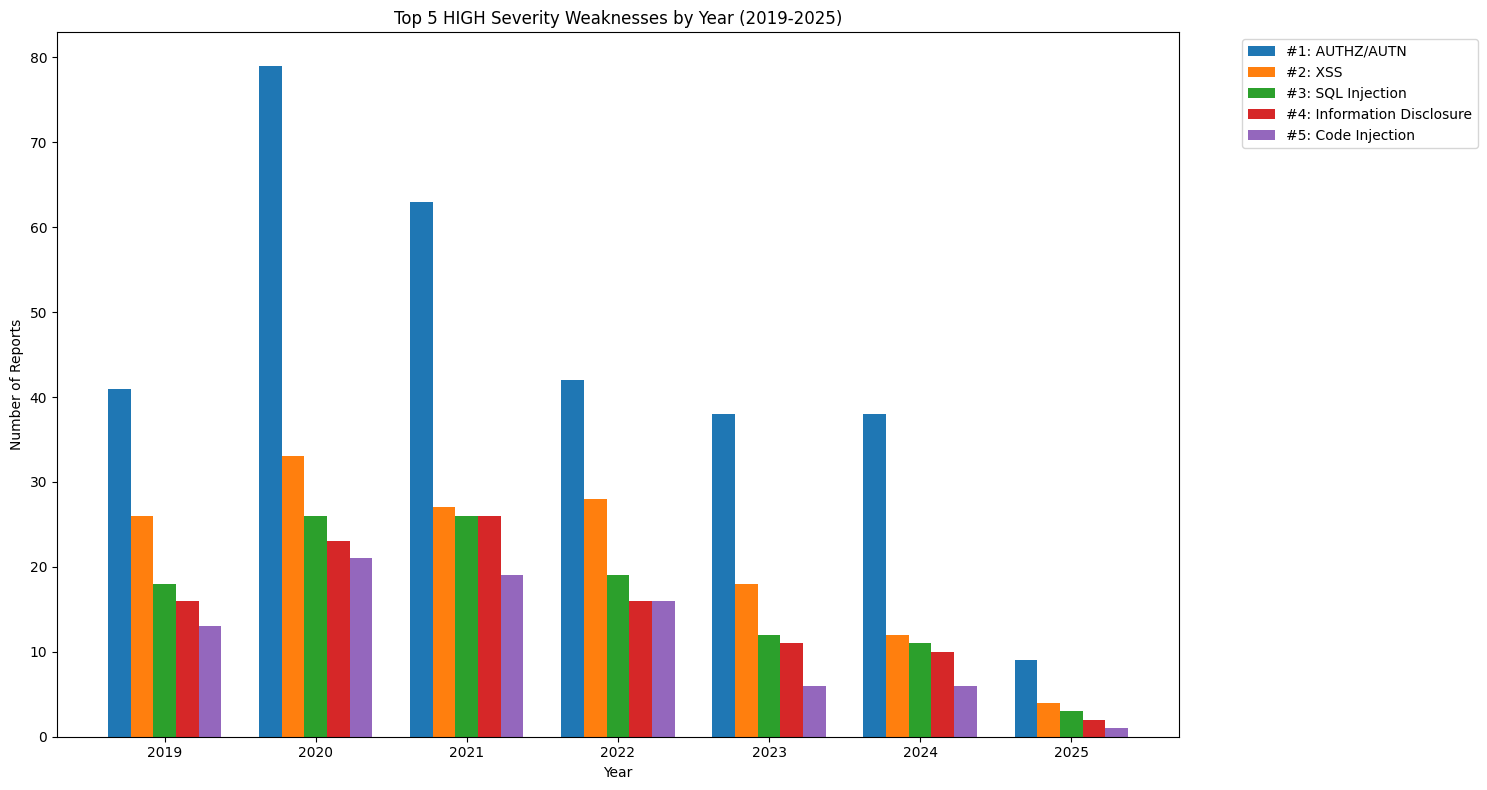

In [8]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

def epoch_to_year(epoch_time):
    """Convert Unix epoch timestamp to year
    
    Args:
        epoch_time (int): Unix epoch timestamp
        
    Returns:
        int: Year extracted from timestamp
    """
    return datetime.fromtimestamp(epoch_time).year


def convert_weakness(weakness):
    ISSUES_MAPPING = {
        "XSS": [
            "Cross-site Scripting (XSS) - Stored",
            "Cross-site Scripting (XSS) - DOM", 
            "Cross-site Scripting (XSS) - Reflected",
            "Cross-site Scripting (XSS) - Generic",
            "Reflected XSS"
        ],
        "AUTHZ/AUTN": [
            "Improper Access Control - Generic",
            "Insecure Direct Object Reference (IDOR)",
            "Improper Authentication - Generic", 
            "Authentication Bypass Using an Alternate Path or Channel",
            "Improper Authorization",
            "Authentication Bypass",
            "Missing Critical Step in Authentication",
            "Incorrect Authorization",
            "Improper Privilege Management",
            "Incorrect Privilege Assignment",
            "Privilege Escalation",
        ]
    }
    # Check if weakness matches any values in the mapping
    for key, values in ISSUES_MAPPING.items():
        if weakness in values:
            return key
            
    # Return original weakness if no match found
    return weakness

def analyze_top_weaknesses_by_year():
    """Analyze top 5 weaknesses for each year from 2019-2025 (HIGH severity only)"""
    reports_dir = Path("reports")
    
    # Initialize yearly weakness counters
    yearly_weaknesses = {year: Counter() for year in range(2019, 2026)}
    
    # Process all reports
    for report_file in reports_dir.glob("*.json"):
        with open(report_file, "r") as f:
            try:
                report = json.load(f)
                
                # Skip if not HIGH severity
                severity = map_severity_to_level(report.get("severity"))
                if severity != SeverityLevel.HIGH.value:
                    continue
                    
                # Get year and weaknesses
                year = epoch_to_year(report["disclosed_date"])
                if year < 2019 or year > 2025:
                    continue
                    
                weaknesses = report.get("weaknesses", [])
                if not weaknesses:
                    continue
                    
                # Count each weakness for that year
                for weakness in weaknesses:
                    weakness = convert_weakness(weakness)
                    yearly_weaknesses[year][weakness] += 1
                    
            except (json.JSONDecodeError, KeyError):
                continue
                
    # Plot results
    fig, ax = plt.subplots(figsize=(15, 8))
    
    x = np.arange(2019, 2026)
    width = 0.15
    offsets = np.linspace(-2*width, 2*width, 5)
    
    for i in range(5):
        yearly_values = []
        weakness_names = []
        
        for year in range(2019, 2026):
            # Get top 5 weaknesses for this year
            top_5 = yearly_weaknesses[year].most_common(5)
            
            # Get ith weakness if available, otherwise 0
            if i < len(top_5):
                weakness_names.append(top_5[i][0])
                yearly_values.append(top_5[i][1])
                if i == 0:  # Only print once per year
                    print(f"\nYear {year}:")
                    for rank, (weakness, count) in enumerate(top_5, 1):
                        print(f"#{rank}: {weakness} ({count} reports)")
            else:
                yearly_values.append(0)
                
        # Plot bar for this weakness position
        if any(yearly_values):  # Only plot if there are non-zero values
            ax.bar(x + offsets[i], yearly_values, width, 
                   label=f"#{i+1}: {weakness_names[0]}")
            
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Reports")
    ax.set_title("Top 5 HIGH Severity Weaknesses by Year (2019-2025)")
    ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    ax.set_xticks(x)
    
    plt.tight_layout() 
    plt.show()

# Run the analysis
analyze_top_weaknesses_by_year()


In [4]:
# Count reports with both IDOR and AuthNZ bypass detectable
reports_dir = Path("authnz")
total_reports = 0
both_detectable = 0

for report_file in reports_dir.glob("*.json"):
    with open(report_file, "r") as f:
        try:
            report = json.load(f)
            total_reports += 1
            if report["idor_detectable"] and report["authnz_byppass_detectable"]:
                both_detectable += 1
        except json.JSONDecodeError:
            continue

print(f"Reports with both IDOR and AuthNZ bypass detectable: {both_detectable}")
print(f"Total reports: {total_reports}")
print(f"Percentage: {(both_detectable/total_reports)*100:.1f}%")


Reports with both IDOR and AuthNZ bypass detectable: 148
Total reports: 352
Percentage: 42.0%
